#Training a Single Neuron
##The Perceptron Model
###Tensor Operations

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


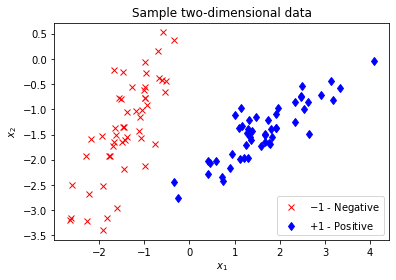

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, class_sep=1.5, 
                           random_state=5)

y[y==0] = -1

fig = plt.figure()

plt.plot(X[0,0],X[0,1],'rx',label='$-1$ - Negative')
plt.plot(X[1,0],X[1,1],'bd',label='$+1$ - Positive')

for i in range(len(y)):
  x1 = X[i,0]
  x2 = X[i,1]
  if (y[i] == -1):
    plt.plot(x1,x2,'rx')
  else:
    plt.plot(x1,x2,'bd')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Sample two-dimensional data')
plt.axis('tight')
plt.savefig('ch.5.two-class.data.png', dpi=350, bbox_inches='tight')
plt.savefig('ch.5.two-class.data.eps', dpi=350, bbox_inches='tight')
plt.show()

##Perceptron Learning Algorithm
###PLA in Python

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


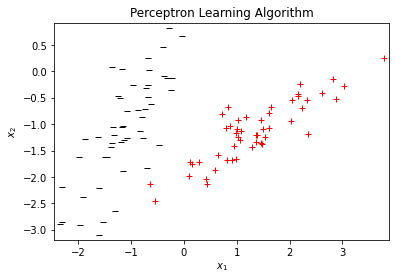

100
36
1
44
5
12
2
13
4
8
2
10
2
3
0


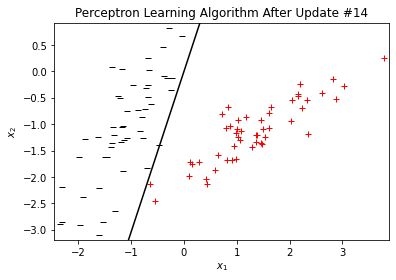

Total iterations:  14


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def pltPer(X, y, W, it=-1):
  title = "Perceptron Learning Algorithm"
  if it > 0:
    title = title + " After Update #" + str(it)
    
  f = plt.figure()
  for n in range(len(y)):
    if y[n] == 1:
      plt.plot(X[n,1],X[n,2],'r+')
    else:
      plt.plot(X[n,1],X[n,2],'k_')
  m, b = -W[1]/W[2], -W[0]/W[2]
  l = np.linspace(min(X[:,1]),max(X[:,1]))
  plt.plot(l, m*l+b, 'k-')
  plt.axis('tight')
  plt.xlim(min(X[:,1])-0.1, max(X[:,1])+0.1)
  plt.ylim(min(X[:,2])-0.1, max(X[:,2])+0.1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")
  plt.title(title)
  plt.savefig('ch.5.PLA.'+str(it)+'.png', dpi=350, bbox_inches='tight')
  plt.savefig('ch.5.PLA.'+str(it)+'.eps', dpi=350, bbox_inches='tight')
  plt.show()


def classification_error(w, X, y):
#   s = np.sign(X.dot(w))
#   return sum(s != y)
    
  err_cnt = 0
  N = len(X)
  for n in range(N):
    s = np.sign(w.T.dot(X[n])) # if this is zero, then :(
    if y[n] != s:
      err_cnt += 1
  print(err_cnt)
  return err_cnt

def choose_miscl_point(w, X, y):
#   for idx in np.random.permutation(len(X)):
#     if np.sign(w.T.dot(X[idx])) != y[idx]:
#       return X[idx], y[idx]
  mispts = []
  # Choose a random point among the misclassified
  for n in range(len(X)):
    if np.sign(w.T.dot(X[n])) != y[n]:
      mispts.append((X[n], y[n]))
  #print(len(mispts))
  return mispts[random.randrange(0,len(mispts))]

# main
N = 100
random.seed(a = 7)
np.random.seed(7)

X, y = make_classification(n_samples=N, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, class_sep=1.2, 
                           random_state=5)

y[y==0] = -1

X_train = np.append(np.ones((N,1)), X, 1)   # add a column of ones

# initialize the weights to zeros
w = np.zeros(X_train.shape[1])
it = 0
pltPer(X_train,y,w)  # initial solution (likely bad)

# Iterate until all points are correctly classified
while classification_error(w, X_train, y) != 0:
  it += 1
  # Pick random misclassified point
  x, s = choose_miscl_point(w, X_train, y)
  # Update weights
  w += s*x
  if it > 1000:
    break
pltPer(X_train,y,w, it)

print("Total iterations: ", it)


##Perceptron over Non-Linearly Separable Data
###Convergence on Linearly Separable Data

In [ ]:
#@title
# Using PLA 

import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def pltPer(X, y, W, it=-1):
  title = "Perceptron Learning Algorithm"
  if it > 0:
    title = title + " After Update #" + str(it)
    
  f = plt.figure()
  for n in range(len(y)):
    if y[n] == 1:
      plt.plot(X[n,1],X[n,2],'r+')
    else:
      plt.plot(X[n,1],X[n,2],'k_')
  m, b = -W[1]/W[2], -W[0]/W[2]
  l = np.linspace(min(X[:,1]),max(X[:,1]))
  plt.plot(l, m*l+b, 'k-')
  plt.axis('tight')
  plt.xlim(min(X[:,1])-0.1, max(X[:,1])+0.1)
  plt.ylim(min(X[:,2])-0.1, max(X[:,2])+0.1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")
  plt.title(title)
  plt.savefig('ch.5.PLA.'+str(it)+'.png', dpi=350, bbox_inches='tight')
  plt.savefig('ch.5.PLA.'+str(it)+'.eps', dpi=350, bbox_inches='tight')
  plt.show()


def classification_error(w, X, y):
#   s = np.sign(X.dot(w))
#   return sum(s != y)
    
  err_cnt = 0
  N = len(X)
  for n in range(N):
    s = np.sign(w.T.dot(X[n])) # if this is zero, then :(
    if y[n] != s:
      err_cnt += 1
#   print(err_cnt)
  return err_cnt

def choose_miscl_point(w, X, y):
#   for idx in np.random.permutation(len(X)):
#     if np.sign(w.T.dot(X[idx])) != y[idx]:
#       return X[idx], y[idx]
  mispts = []
  # Choose a random point among the misclassified
  for n in range(len(X)):
    if np.sign(w.T.dot(X[n])) != y[n]:
      mispts.append((X[n], y[n]))
  #print(len(mispts))
  return mispts[random.randrange(0,len(mispts))]

def perceptron_la(X, y):
  X_train = np.append(np.ones((N,1)), X, 1)   # add a column of ones

  # initialize the weights to zeros
  w = np.zeros(X_train.shape[1])
  it = 0
#   pltPer(X_train,y,w)  # initial solution (likely bad)

  # Iterate until all points are correctly classified
  while classification_error(w, X_train, y) != 0:
    it += 1
    # Pick random misclassified point
    x, s = choose_miscl_point(w, X_train, y)
    # Update weights
    w += s*x
    if it > 1000:
      break
#   pltPer(X_train,y,w, it)
  return X_train, w, it


Streaming output truncated to the last 5000 lines.
Total iterations:  5
Total iterations:  2
Total iterations:  4
Total iterations:  4
Total iterations:  10
Total iterations:  4
Total iterations:  8
Total iterations:  2
Total iterations:  1
Total iterations:  4
Total iterations:  1
Total iterations:  2
Total iterations:  9
Total iterations:  4
Total iterations:  3
Total iterations:  6
Total iterations:  3
Total iterations:  1
Total iterations:  2
Total iterations:  4
Total iterations:  3
Total iterations:  6
Total iterations:  4
Total iterations:  1
Total iterations:  1
Total iterations:  4
Total iterations:  4
Total iterations:  1
Total iterations:  9
Total iterations:  4
Total iterations:  1
Total iterations:  3
Total iterations:  5
Total iterations:  2
Total iterations:  10
Total iterations:  1
Total iterations:  1
Total iterations:  12
Total iterations:  4
Total iterations:  5
Total iterations:  8
Total iterations:  4
Total iterations:  4
Total iterations:  12
Total iterations:  3


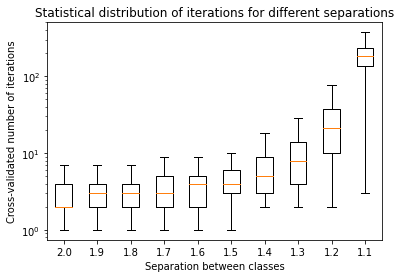

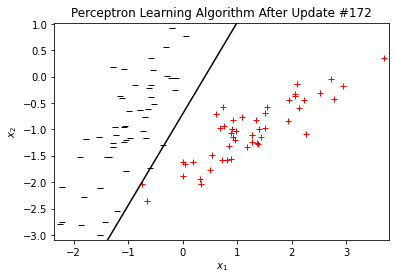

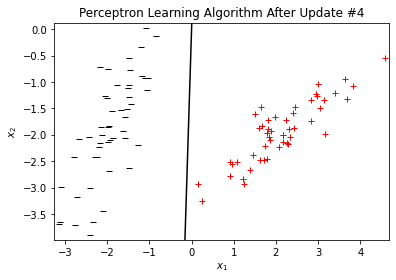

In [ ]:
# main
N = 100
random.seed(a = 7)
np.random.seed(7)
PLAdata = np.zeros((1000,10),dtype='int')

cnt = 0
for separation in np.arange(2.0, 1.0, -0.1):
  for k in range(1000):
    X, y = make_classification(n_samples=N, n_features=2, n_classes=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_clusters_per_class=1, class_sep=separation, 
                               random_state=5)

    y[y==0] = -1

    _, _, it = perceptron_la(X,y)
    print("Total iterations: ", it)
    PLAdata[k,cnt] = it    
  cnt += 1
    

print(PLAdata)
print(np.mean(PLAdata,axis=0))
print(np.std(PLAdata,axis=0))

plt.boxplot(PLAdata, labels=['2.0','1.9','1.8','1.7','1.6','1.5','1.4','1.3','1.2','1.1'], showfliers=False)
plt.yscale('log')
plt.xlabel('Separation between classes')
plt.ylabel('Cross-validated number of iterations')
plt.title('Statistical distribution of iterations for different separations')
plt.axis('tight')
plt.savefig('ch.5.two-class.boxplot.cv.png', dpi=350, bbox_inches='tight')
plt.savefig('ch.5.two-class.boxplot.cv.eps', dpi=350, bbox_inches='tight')
plt.show()

X, y = make_classification(n_samples=N, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, class_sep=1.1, 
                           random_state=5)
y[y==0] = -1
X_train, w, it = perceptron_la(X,y)
pltPer(X_train,y,w, it)

X, y = make_classification(n_samples=N, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, class_sep=2.0, 
                           random_state=5)
y[y==0] = -1
X_train, w, it = perceptron_la(X,y)
pltPer(X_train,y,w, it)

###Convergence on Non-Linearly Separable Data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


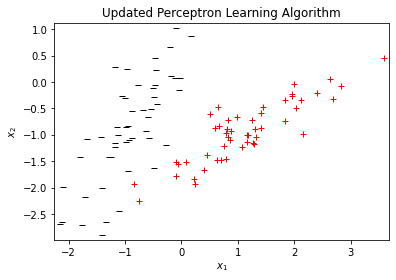

0 100 [0.0, 0.0, 0.0]
1 44 [1.0, 1.2835669814481265, -1.1823332177237444]
2 7 [0.0, 2.0558690185493607, -1.1170552325689436]
8 3 [0.0, 3.8733643096363752, -0.9610763449366988]
27 2 [-1.0, 6.922083593872955, -1.9221623632273177]
95 1 [-3.0, 8.641360946984442, -4.2459333002463655]


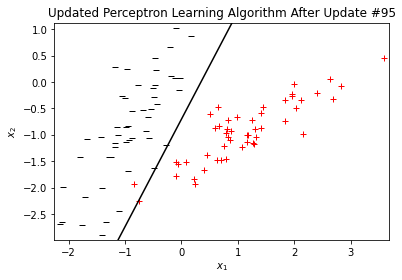

95 1 [-3.0, 8.641360946984442, -4.2459333002463655]
Best found at iteration:  95
Number of misclassified points:  1


In [ ]:
# Updated PLA 

import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def pltPer(X, y, W, it=-1):
  title = "Updated Perceptron Learning Algorithm"
  if it > 0:
    title = title + " After Update #" + str(it)
    
  f = plt.figure()
  for n in range(len(y)):
    if y[n] == 1:
      plt.plot(X[n,1],X[n,2],'r+')
    else:
      plt.plot(X[n,1],X[n,2],'k_')
  m, b = -W[1]/W[2], -W[0]/W[2]
  l = np.linspace(min(X[:,1]),max(X[:,1]))
  plt.plot(l, m*l+b, 'k-')
  plt.axis('tight')
  plt.xlim(min(X[:,1])-0.1, max(X[:,1])+0.1)
  plt.ylim(min(X[:,2])-0.1, max(X[:,2])+0.1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")
  plt.title(title)
  plt.savefig('ch.5.UPLA.'+str(it)+'.png', dpi=350, bbox_inches='tight')
  plt.savefig('ch.5.UPLA.'+str(it)+'.eps', dpi=350, bbox_inches='tight')
  plt.show()


def classification_error(w, X, y):
  s = np.sign(X.dot(w))
  return sum(s != y)
     
def choose_miscl_point(w, X, y):
  for idx in np.random.permutation(len(X)):
    if np.sign(w.T.dot(X[idx])) != y[idx]:
      return X[idx], y[idx]
  
# main
N = 100
random.seed(a = 7)
np.random.seed(7)

X, y = make_classification(n_samples=N, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, class_sep=1.0, 
                           random_state=5)

y[y==0] = -1

X_train = np.append(np.ones((N,1)), X, 1)   # add a column of ones

# initialize the weights to zeros
w = np.zeros(X_train.shape[1])
it = 0
bestW = {}
bestW['err'] = N + 1   # dictionary to keep best solution
bestW['w'] = []
bestW['it'] = it
pltPer(X_train,y,w)  # initial solution (likely bad)

# Iterate until all points are correctly classified
while it < 1000:
  err = classification_error(w, X_train, y)
  if err < bestW['err']:  # enter to save a new w
    bestW['err'] = err
    bestW['it'] = it
    bestW['w'] = list(w)
    print(it,bestW['err'],bestW['w'])
  if err == 0:
    break
  it += 1
  # Pick random misclassified point
  x, s = choose_miscl_point(w, X_train, y)
  # Update weights
  w += s*x

pltPer(X_train, y, bestW['w'], bestW['it'])
print(bestW['it'],bestW['err'],bestW['w'])
print("Best found at iteration: ", bestW['it'])
print("Number of misclassified points: ", bestW['err'])